In [1]:
from matplotlib import pylab
from scipy import stats
import nengo
import numpy as np


%matplotlib inline

In [2]:
STEP = 0.001#s
EQ_MARGIN = 0.0001
SIM_TIME = 200#s
SWITCH_TIME = 0.500#s
SWITCH_TIME2 = 0.050#s
CHECKS = 45
DIVIDER = 1
SIM_TIME2 = SWITCH_TIME2#s
DIST = 10
D_STEP = 10
MOD = 23
B_STEP = 180/CHECKS

def tocirc(v, sin=True):
    if sin:
        comp = np.sin
    else:
        comp = np.cos
    return comp(v*np.pi/2)

def fn(vals, vals2, vals3):
    s = SWITCH_TIME
    vs = vals
#    cur = STEP
    i = 0
    #prep yield
    t = yield
    init = t
    cur = init
    #print t
    while True:
    #initial training
        if -EQ_MARGIN <= t-SIM_TIME-init <= EQ_MARGIN:
            break
        if -EQ_MARGIN <= t-cur-s <= EQ_MARGIN:
            #print '*********************************************'
            cur = t
            i += 1
        t = yield [vs[i]]
        #print cur, t, t-cur, s, t-cur-s, -EQ_MARGIN <= t-cur-s <= EQ_MARGIN
    s = SWITCH_TIME2
    vs = vals2
    cur = t
    i = 0
    while True:
    #assessment 1
        if i >= len(vals2):
            print 'too far', t
            break
        t = yield [vs[i]]
        if -EQ_MARGIN <= t-cur-s <= EQ_MARGIN:
            cur = t
            i += 1
    s = SWITCH_TIME
    vs = vals3
    cur = t
    resim_time = SIM_TIME/DIVIDER+t
    i = 0
    while True:
    #retraining
        if -EQ_MARGIN <= t-resim_time <= EQ_MARGIN:
            break
        if -EQ_MARGIN <= t-cur-s <= EQ_MARGIN:
            cur = t
            i += 1
        t = yield [vs[i]]
    s = SWITCH_TIME2
    vs = vals2
    cur = t
    i = 0
    while True:
    #assessment 2
        if i >= len(vals2):
            print 'too far', t
            break
        t = yield [vs[i]]
        if -EQ_MARGIN <= t-cur-s <= EQ_MARGIN:
            cur = t
            i += 1
    while True:
        t = yield [0]
        
def fn2(vals, vals2, vals3, mod):
    s = SWITCH_TIME
    vs = vals
#    cur = STEP
    i = 0
    #prep yield
    t = yield
    init = t
    cur = init
    #print t
    while True:
    #initial training
        if -EQ_MARGIN <= t-SIM_TIME-init <= EQ_MARGIN:
            break
        if -EQ_MARGIN <= t-cur-s <= EQ_MARGIN:
            cur = t
            i += 1
        t = yield [tocirc(vs[i]), tocirc(vs[i], False)]
    s = SWITCH_TIME2
    vs = vals2
    cur = t
    i = 0
    while True:
    #assessment 1
        if i >= len(vals2):
            print 'too far', t
            break
        t = yield [0, 0]
        if -EQ_MARGIN <= t-cur-s <= EQ_MARGIN:
            cur = t
            i += 1
    s = SWITCH_TIME
    vs = vals3
    cur = t
    resim_time = SIM_TIME/DIVIDER+t
    i = 0
    while True:
    #retraining
        if -EQ_MARGIN <= t-resim_time <= EQ_MARGIN:
            break
        if -EQ_MARGIN <= t-cur-s <= EQ_MARGIN:
            cur = t
            i += 1
        t = yield [tocirc(vs[i]-mod), tocirc(vs[i]-mod, False)]
    s = SWITCH_TIME2
    vs = vals2
    cur = t
    i = 0
    while True:
    #assessment 2
        if i >= len(vals2):
            print 'too far', t
            break
        t = yield [0, 0]
        if -EQ_MARGIN <= t-cur-s <= EQ_MARGIN:
            cur = t
            i += 1
    while True:
        t = yield [0, 0]
        
def fn3(vals, vals2, vals3):
    s = SWITCH_TIME
    vs = vals
#    cur = STEP
    i = 0
    #prep yield
    t = yield
    init = t
    cur = init
    #print t
    while True:
    #initial training
        if -EQ_MARGIN <= t-SIM_TIME-init <= EQ_MARGIN:
            break
        if -EQ_MARGIN <= t-cur-s <= EQ_MARGIN:
            cur = t
            i += 1
        t = yield 0
    s = SWITCH_TIME2
    vs = vals2
    cur = t
    i = 0
    while True:
    #assessment 1
        if i >= len(vals2):
            print 'too far', t
            break
        t = yield 1
        if -EQ_MARGIN <= t-cur-s <= EQ_MARGIN:
            cur = t
            i += 1
    s = SWITCH_TIME
    vs = vals3
    cur = t
    resim_time = SIM_TIME/DIVIDER+t
    i = 0
    while True:
    #retraining
        if -EQ_MARGIN <= t-resim_time <= EQ_MARGIN:
            break
        if -EQ_MARGIN <= t-cur-s <= EQ_MARGIN:
            cur = t
            i += 1
        t = yield 0
    s = SWITCH_TIME2
    vs = vals2
    cur = t
    i = 0
    while True:
    #assessment 2
        if i >= len(vals2):
            print 'too far', t
            break
        t = yield 1
        if -EQ_MARGIN <= t-cur-s <= EQ_MARGIN:
            cur = t
            i += 1
    while True:
        t = yield 1

In [3]:
model = nengo.Network(seed=3)
dist = nengo.dists.Uniform(-1.0, 1.0)
vals = dist.sample((SIM_TIME/SWITCH_TIME)+1)
vals3 = dist.sample((SIM_TIME/SWITCH_TIME/DIVIDER)+1)
vals2 = np.linspace(-1, 1, CHECKS)
GAP = vals2[1]-vals2[0]
mod = GAP*MOD/B_STEP
func = fn(vals, vals2, vals3)
func.next()
func = func.send
func2 = fn2(vals, vals2, vals3, mod)
func2.next()
func2 = func2.send
func3 = fn3(vals, vals2, vals3)
func3.next()
func3 = func3.send

In [4]:
#xx = [np.sin(x*np.pi/2) for x in np.linspace(-1, 1, 45)]
#yy = [np.cos(x*np.pi/2) for x in np.linspace(-1, 1, 45)]
#print xx
#pylab.plot(xx, yy)
#for i in range(len(xx)-1):
#    pylab.plot([xx[i], 0], [yy[i], 0])

In [5]:
#time = int(2*(SIM_TIME/STEP)+2*(CHECKS*SWITCH_TIME2/STEP))
#print time
#a = [func(0.001*x) for x in range(1, time+1)]
#d = [func2(0.001*x) for x in range(1, time+1)]

In [6]:
#print mod
#b = np.array(a)
#c = b[:, 0]
#e = np.array(d)
#print list(c).index(-1.0)
#x, y = 104500-50, 104501
#print c[x:y]
#print c.shape
#print [jj[0] for jj in e[x:y]]

In [7]:
#d = {}
#z=52200
#for a in set(c[:]):
#    d[a] = 0
#for a in c[:]:
#    d[a] += 1
#for k in d:
#    if d[k] != 500 and d[k] != 1500 and d[k] != 50 and d[k] != 150:
#        print k, d[k]
#print c[0], c[499], c[500], c[999], c[1000], c[1499]
#print c[49998], c[49999]
#print c[3501], c[4001], c[1500], c[2000], c[2001]
#print c[52200-1:52250]
#print [i for i, x in enumerate(c[:z]) if -0.01 < x+0.421665933532 < 0.01]

In [8]:
#print np.sin((0.5-(GAP*MOD/B_STEP))*np.pi/2)
#print convertandmod(np.sin(0.5*np.pi/2))

#n=35
#pylab.plot(xx, yy)
#pylab.plot([xx[n], 0], [yy[n], 0])
#pylab.plot([convertandmod(xx[n])[0], 0], [convertandmod(xx[n])[1], 0])

In [9]:
with model:
    stim = nengo.Node(func)
    stim2 = nengo.Node(func2)
    stop_learn = nengo.Node(func3)
    
    sensory = nengo.Ensemble(n_neurons=400, dimensions=2,
                            intercepts=nengo.dists.Uniform(0.81,0.91))
    
    
    spatial = nengo.Ensemble(n_neurons=400, dimensions=2,
                            intercepts=nengo.dists.Uniform(0.81,0.91))
    
    nengo.Connection(stim, sensory[:],
                     function=lambda x: (tocirc(x[0]), 
                                         tocirc(x[0], False)))
    
    #nengo.Connection(sensory[:2], sensory[2:], synapse=0.2)
    
    c = nengo.Connection(sensory, spatial, function=lambda x: [0,0],
                         learning_rule_type=nengo.PES(learning_rate=3e-4))
        
    error = nengo.Ensemble(n_neurons=400, dimensions=2)
    
    nengo.Connection(stop_learn, error.neurons, transform=-10*np.ones((400, 1)))
    nengo.Connection(stim2, error, transform=-1)
    nengo.Connection(error, c.learning_rule)
                     #0.19 is 17deg shift (need more negative to mitigate it)
                     #function=lambda x: x[:2] if x[2] > 0.7 else convertandmod(x[0]) if x[2] > 0.3 else [0, 0])
    #nengo.Connection(spatial, c.learning_rule, synapse=0.1)
    
    nengo.Connection(spatial, error)
    #correct = nengo.Node([0,0])
    #nengo.Connection(correct, error, transform=-1)
    
    spatial_probe = nengo.Probe(spatial.neurons)
    


In [10]:
def sim_gen(time, cnt):
    cur = 0
    yield np.mean(sim.data[spatial_probe][-int(SWITCH_TIME2/STEP):], axis=0) #prep
    while cur <= cnt:
        sim.run(time, progress_bar=False)
        yield np.mean(sim.data[spatial_probe][-int(SWITCH_TIME2/STEP):], axis=0)
        #print sim.data[spatial_probe].shape
        cur += 1
        
def calc_norm(rates, rate_peaks=None):
    #assume that cells with similar peak centers would fall under the same
    #multicellular recording therefore peaks are done relative to all values with similar peaks
    nrm_rates = []
    if rate_peaks is None:
        rate_peaks = np.max(rates, axis=1)
        rate_peaks = np.array([p if p > 0 else 1 for p in rate_peaks])
    max_i = np.argmax(rates, axis=0)
    for j, i in enumerate(max_i):
        nrm_rates.append(rates[:, j]/rate_peaks[i])
    nrm_rates = np.array(nrm_rates).transpose()
    return nrm_rates, rate_peaks

#def align_cut(nrm, dist, num_checks, maxes=None):
    #below uses the protocol from the paper where the center value of the values with >= 50% of
    #the max value is used as the max
    #cut assumes that it is not multimodal
#    if maxes is None:
#        cut = [[(i, neuron_val) for i, neuron_val in enumerate(nrm[:, col]) 
#                if neuron_val >= 0.5] for col in range(nrm.shape[1])]
#        maxes = [(i, neuron_vals[len(neuron_vals)/2][0]) 
#                 for i, neuron_vals in enumerate(cut) 
#                 if len(neuron_vals) > 0]
#    max_cuts = [nrm[mx-dist:mx+dist+1, i] 
#                for i, mx in maxes 
#                if mx >= dist and mx <= num_checks-(dist+1)]
#    return np.array(max_cuts), maxes

def align_cut2(nrm, dist, num_checks, maxes=None):
    if maxes is None:
        #temp = {k: nrm[:, k] for k in range(nrm.shape[1])}
        #print temp[1]
        cut = {col: [(i, neuron_val) for i, neuron_val in enumerate(nrm[:, col]) 
                   if neuron_val > 0.5] 
               for col in range(nrm.shape[1])}
        #print cut[1]
        maxes = {k: neuron_vals[len(neuron_vals)/2][0] for k, neuron_vals in cut.items()
                if len(neuron_vals) > 0}
        for k in cut:
            try:
                maxes[k]
            except KeyError:
                maxes[k] = 0
    max_cuts = {i: nrm[mx-dist:mx+dist+1, i] 
                for i, mx in maxes.items() 
                if mx >= dist and mx <= num_checks-(dist+1)}
    return max_cuts, maxes

def prep_graph(time, cnt, dist):
    sim_g = sim_gen(time, cnt)
    sim_g.next()
    return align_cut(calc_norm(np.array([mean for mean in sim_g])), dist)

def graph_neurons(vals, step):
    pylab.xlabel('ITD (us)')
    pylab.ylabel('Normed Response')
    for v in range(vals.shape[0]):
        pylab.plot(range(-DIST*step, DIST*step+1, step), vals[v, :])

def graph_mean(mean, step):
    pylab.xlabel('ITD (us)')
    pylab.ylabel('Normed Response')
    pylab.plot(range(-DIST*step, DIST*step+1, step), mean)
    
def filtered_mean(vals):
    return np.mean([x for x in vals if sum(x) > 0], axis=0)

In [11]:
#a, m = align_cut2(n2, DIST, len(vals2))
#print m.keys() == range(400)

In [12]:
sim = nengo.Simulator(model)

In [13]:
sim.run(SIM_TIME)

Simulation finished in 0:01:20.                                                 


In [14]:
sim_g = sim_gen(SIM_TIME2, len(vals2)-1)
a=sim_g.next()
#print a.shape
mean = np.array([mean for mean in sim_g])
#print mean.shape
#Y = len(j)
#print Y

too far 202.25
too far 202.25
too far 202.25


In [15]:
n, rate_peaks = calc_norm(mean)

In [16]:
out_, maxes = align_cut2(n, DIST, len(vals2))
out = np.array(out_.values())
print out.shape
print [len(x) for x in out]
mean_out = np.mean(out, axis=0)
print mean_out.shape

(112, 21)
[21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21]
(21,)


In [17]:
def runstats(mvals, vals):
    m = np.max(mvals)
    print 'max', m
    print list(mvals).index(m)
    print np.max(vals, axis=1)

In [30]:
runstats(mean_out, out)
runstats(mean_out2, out2)
runstats(mean_out3, out3)

max 0.72754880461
10
[ 0.55555556  0.66666667  0.66666667  0.78947368  1.          0.57894737
  0.77777778  0.52631579  1.          1.          0.89473684  0.84210526
  0.77777778  1.          0.94736842  0.77777778  0.78947368  0.66666667
  0.83333333  0.52631579  0.76470588  0.84210526  0.73684211  1.          1.
  0.55555556  0.63157895  1.          0.78947368  0.84210526  0.84210526
  0.89473684  0.9         0.52631579  0.83333333  0.72222222  0.89473684
  0.94444444  0.88888889  0.63157895  0.6         0.57894737  0.78947368
  0.75        0.61111111  0.78947368  0.52631579  0.77777778  0.55        1.
  0.88888889  0.55555556  0.61111111  1.          1.          0.61111111
  0.84210526  0.66666667  0.88888889  0.73684211  0.55555556  0.83333333
  0.57894737  0.68421053  0.84210526  0.73684211  0.84210526  0.65
  0.52631579  1.          0.63157895  0.78947368  0.55555556  0.73684211
  0.83333333  0.88888889  0.6         0.55555556  0.52631579  0.84210526
  0.77777778  0.72222222  0.

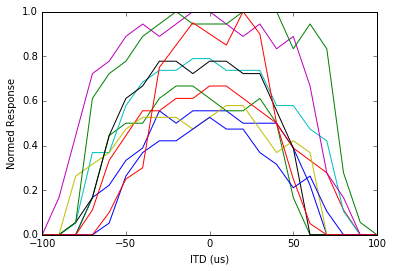

In [19]:
graph_neurons(out[:10], D_STEP)

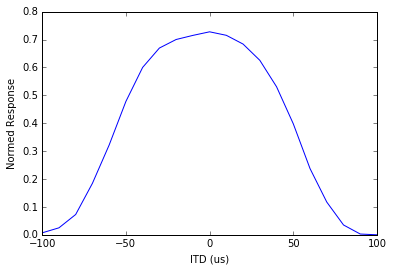

In [20]:
graph_mean(mean_out, D_STEP)

In [21]:
sim.run(SIM_TIME/DIVIDER)

Simulation finished in 0:01:22.                                                 


In [22]:
sim_g = sim_gen(SIM_TIME2, len(vals2)-1)
a2=sim_g.next()
#print a.shape
mean2 = np.array([mean for mean in sim_g])
print mean2.shape

too far 404.5
too far 404.5
too far 404.5
(45, 400)


In [23]:
n2, rate_peaks2 = calc_norm(mean2)

In [24]:
#Centered the graphs relative to themselves
out_2, maxes2 = align_cut2(n2, DIST, len(vals2))
#print out_2
out2 = np.array(out_2.values())
print out2.shape
print out2[0]
print [len(x) for x in out2]
mean_out2 = filtered_mean(out2)
print mean_out2.shape

(105, 21)
[ 0.          0.          0.          0.11111111  0.27777778  0.38888889
  0.44444444  0.5         0.55555556  0.55555556  0.55555556  0.55555556
  0.5         0.55555556  0.5         0.38888889  0.22222222  0.          0.
  0.          0.        ]
[21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21]
(21,)


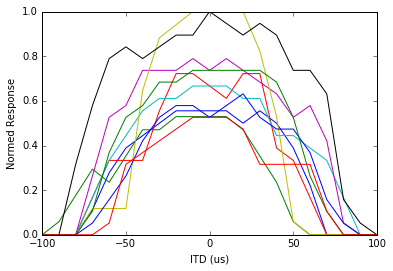

In [25]:
graph_neurons(out2[:10], D_STEP)

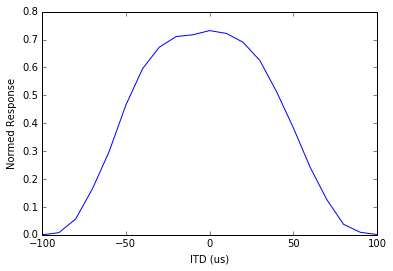

In [26]:
graph_mean(mean_out2, D_STEP)

In [27]:
#Centered the graphs relative to the original distribution
out_3, maxes3 = align_cut2(n2, DIST, len(vals2), maxes)
out3 = np.array(out_3.values())
print out3.shape
print [len(x) for x in out3]
mean_out3 = filtered_mean(out3)
#print np.mean([x for x in out3 if sum(x) > 0], axis=1)
#print np.sum([x for x in out3 if sum(x) > 0], axis=1)
#print mean_out3.shape

(112, 21)
[21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21]


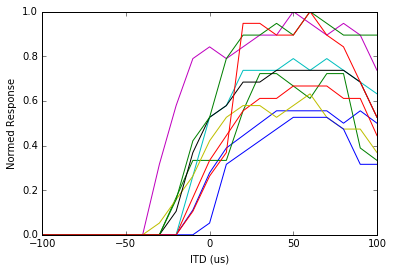

In [28]:
graph_neurons(out3[:10], D_STEP)

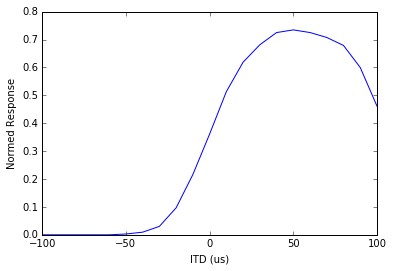

In [29]:
graph_mean(mean_out3, D_STEP)

In [ ]:
print out_.keys()[0]
print maxes[1]
print maxes2[1]
print n2[15:18, 1]
print n2[16-DIST:16+DIST+1, 1]
print out_2[1]
print out_3[1]

ttt = []
for k in out_3:
    t = maxes[k]
    ttt.append(out_3[k] == n2[t-DIST:t+DIST+1, k])
print ttt